In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import voxart

In [22]:
import copy
for k, v in copy.copy(globals()).items():
    print(k, v)

__name__ __main__
__doc__ Automatically created module for IPython interactive environment
__package__ None
__loader__ None
__spec__ None
__builtin__ <module 'builtins' (built-in)>
__builtins__ <module 'builtins' (built-in)>
_ih ['', "get_ipython().run_line_magic('load_ext', 'autoreload')\nget_ipython().run_line_magic('autoreload', '2')", 'import numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\nimport voxart', 'voxart.Masks(2)', 'voxart.Masks(2)', 'dir(voxart)', 'voxart.Masks(2)', 'voxart.__dir__', 'voxart.__dir__()', 'voxart.Masks(2)', 'voxart.Masks(2)', 'voxart.Masks()', 'voxart.Masks(1)', 'global()', 'globals()', 'voxart.Masks(1)', 'voxart.Masks(1)', 'voxart.Masks(1)', 'type(globals())', 'for k, v in globals().items():\n    print(k, v)', 'for k, v in copy.copy(globals().items()):\n    print(k, v)', 'import copy\nfor k, v in copy.copy(globals().items()):\n    print(k, v)', 'import copy\nfor k, v in copy.copy(globals()).items():\n    print(k, v)']
_oh {3: <voxart.s

In [3]:
test_vox2 = voxart.Design.from_size(7)
for i in [0, 6]:
    test_vox2.vox[i, 0, :] = voxart.FILLED
    test_vox2.vox[i, 6, :] = voxart.FILLED
    test_vox2.vox[i, :, 0] = voxart.FILLED
    test_vox2.vox[i, :, 6] = voxart.FILLED
for i in [6]:
    test_vox2.vox[0, i, :] = voxart.FILLED
    test_vox2.vox[6, i, :] = voxart.FILLED
    test_vox2.vox[:, i, 0] = voxart.FILLED
    test_vox2.vox[:, i, 6] = voxart.FILLED
display(test_vox2.vox.sum())
test_vox2._vox

116

array([[[2, 2, 2, 2, 2, 2, 2],
        [2, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 2],
        [2, 2, 2, 2, 2, 2, 2]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 2]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 2]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 2]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],


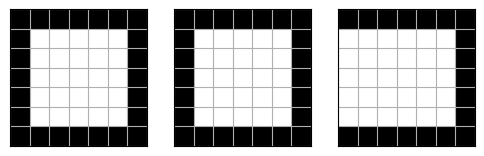

In [6]:
test_vox2.projections_fig()

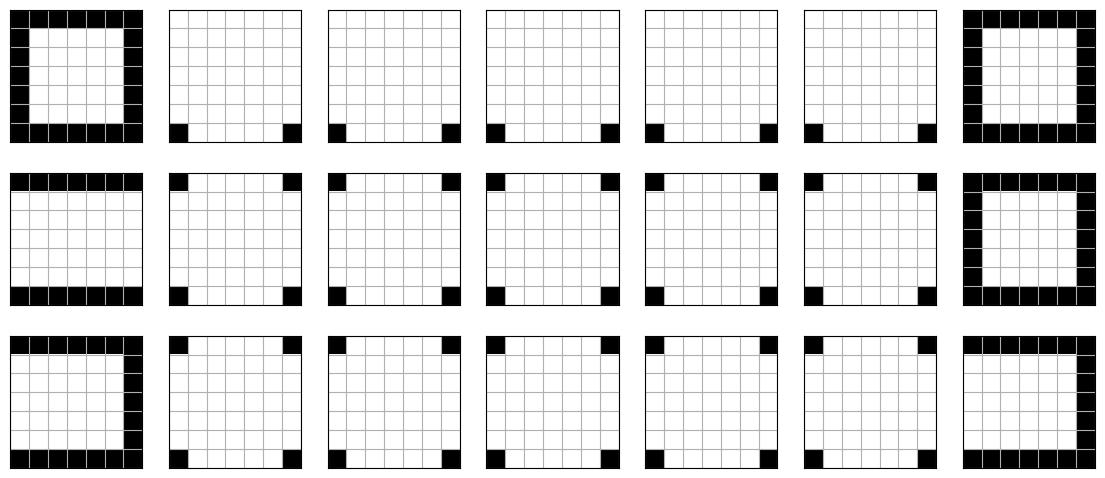

In [7]:
test_vox2.slices_fig()

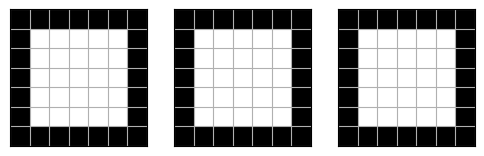

In [8]:
g = voxart.Goal.from_size(7)
g.add_frame()
g.fig()

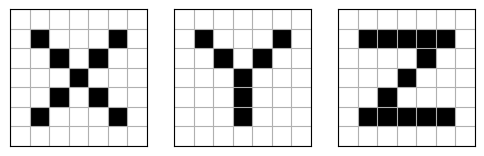

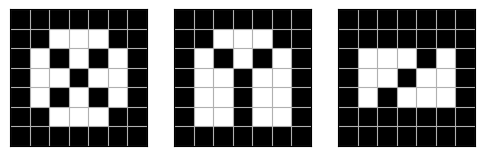

In [9]:
test_goal = voxart.Goal.from_arrays(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 2, 2, 2, 2, 0,],
     [0, 0, 0, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 2, 0, 0, 0, 0,],
     [0, 2, 2, 2, 2, 2, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
)
display(test_goal.fig())
test_goal.add_frame()
display(test_goal.fig())

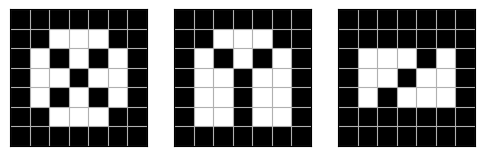

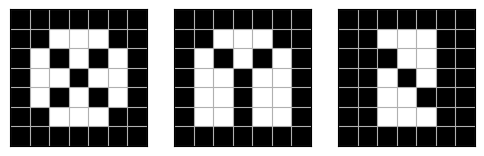

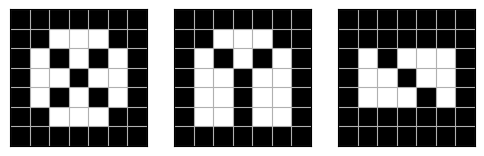

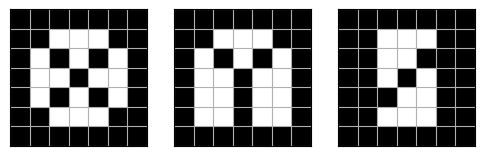

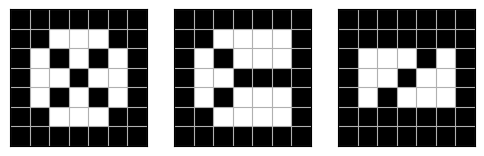

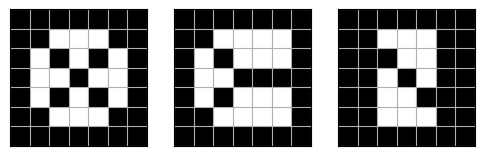

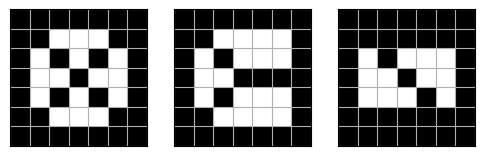

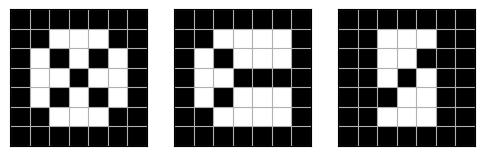

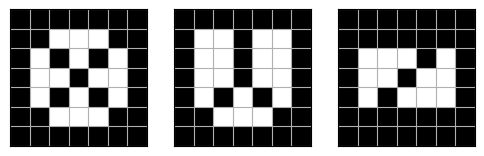

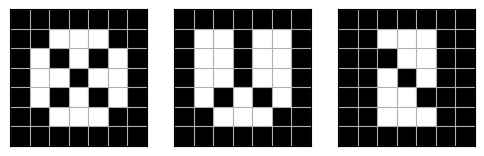

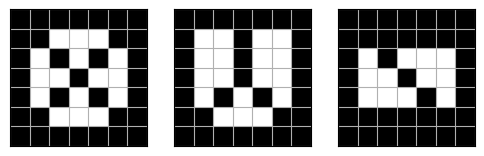

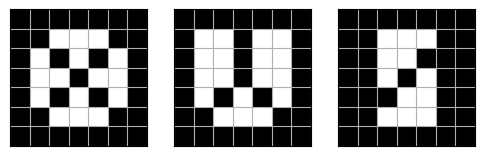

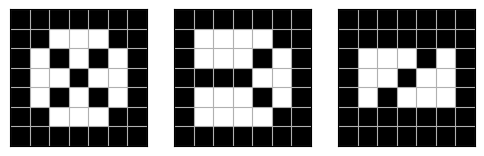

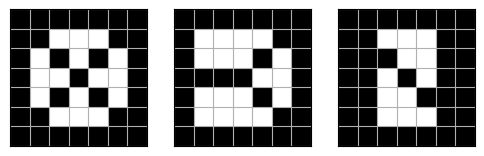

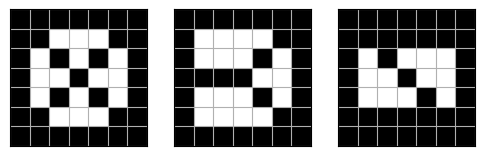

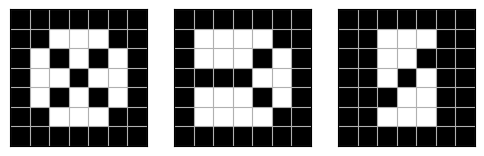

In [11]:
for g in test_goal.alternate_forms():
    display(g.fig())

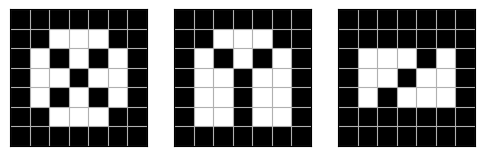

268

In [12]:
design = test_goal.create_base_design()
display(design.projections_fig())
display(design.vox.sum())

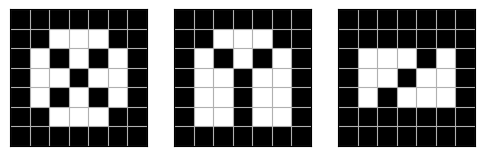

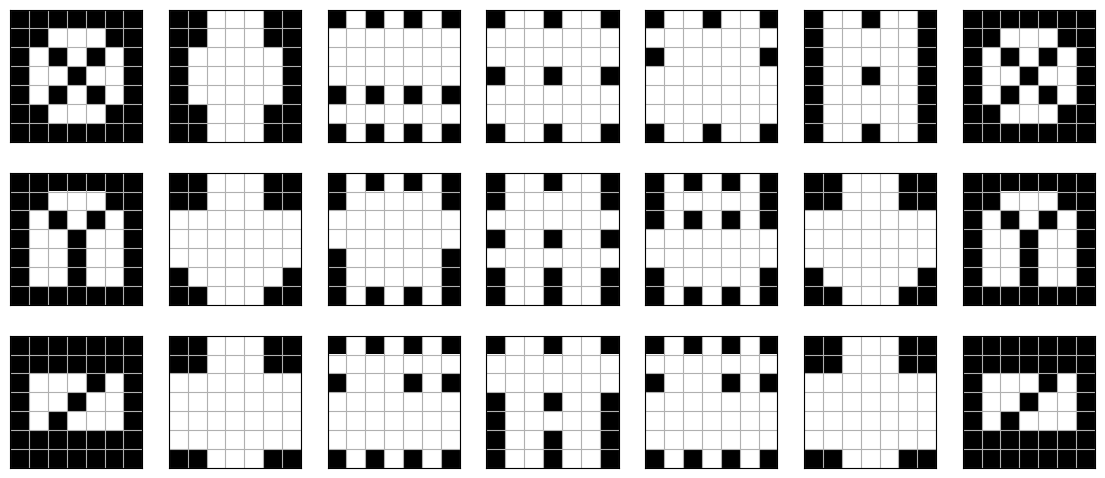

In [13]:
y, z = np.where(test_goal._goals[0] == 0)
design.vox[:, y, z] = 0
x, z = np.where(test_goal._goals[1] == 0)
design.vox[x, :, z] = 0
x, y = np.where(test_goal._goals[2] == 0)
design.vox[x, y, :] = 0
display(design.projections_fig())
display(design.slices_fig())

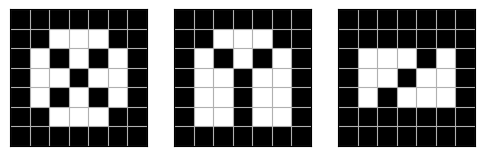

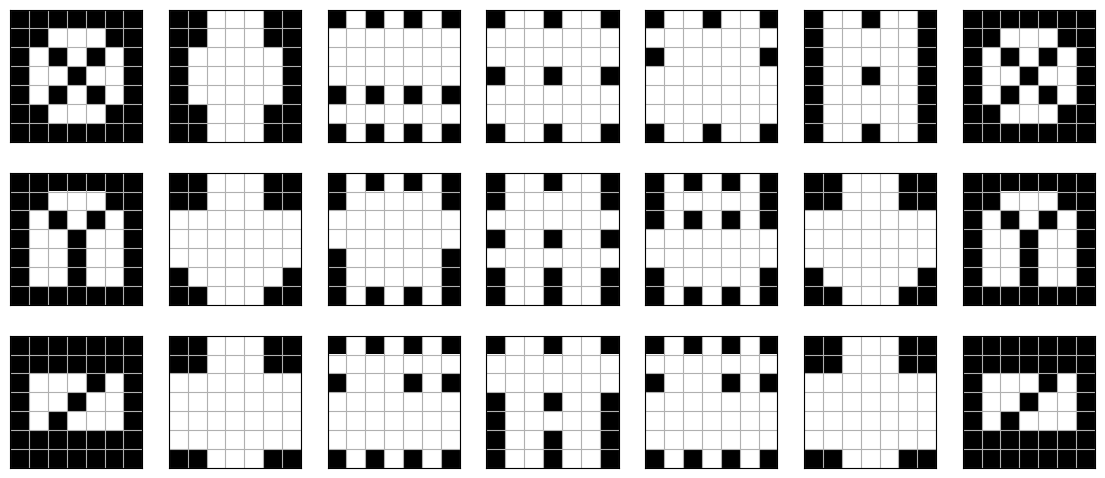

268

In [14]:
design2 = test_goal.create_base_design()
display(design2.projections_fig())
display(design2.slices_fig())
display(design2.vox.sum())

In [15]:
voxart.Masks(4)

## find_removable

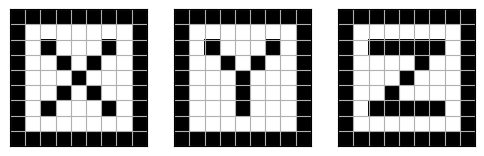

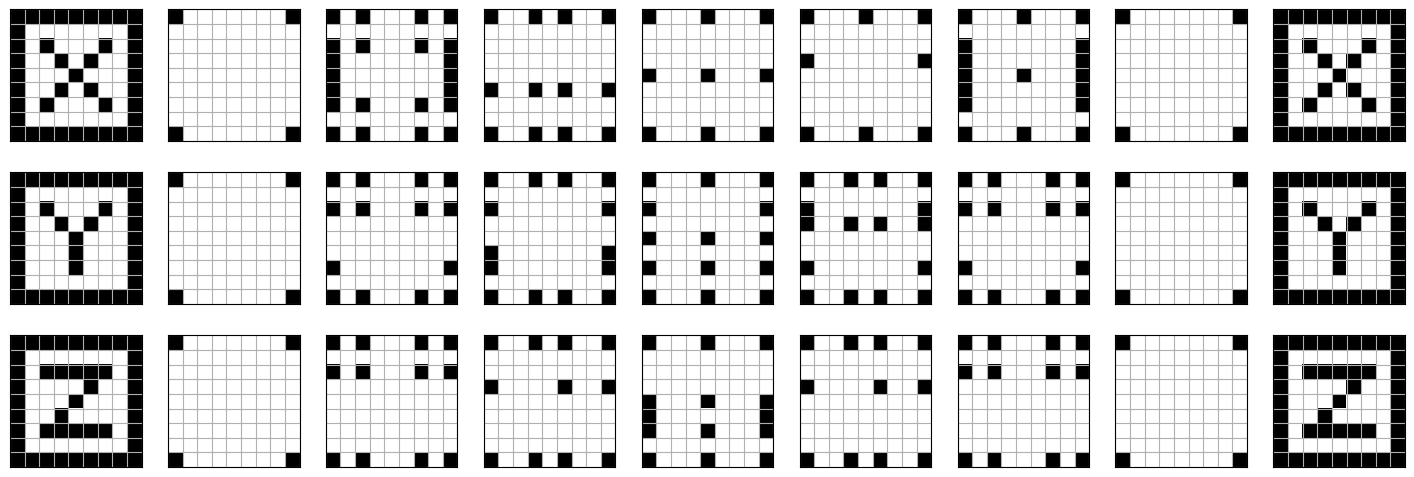

In [16]:
test_goal = voxart.Goal.from_arrays(
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0),
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0),
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 2, 2, 2, 2, 0,],
     [0, 0, 0, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 2, 0, 0, 0, 0,],
     [0, 2, 2, 2, 2, 2, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0)
)
#display(test_goal.fig())
test_goal.add_frame()
display(test_goal.fig())
design = test_goal.create_base_design()
display(design.slices_fig())

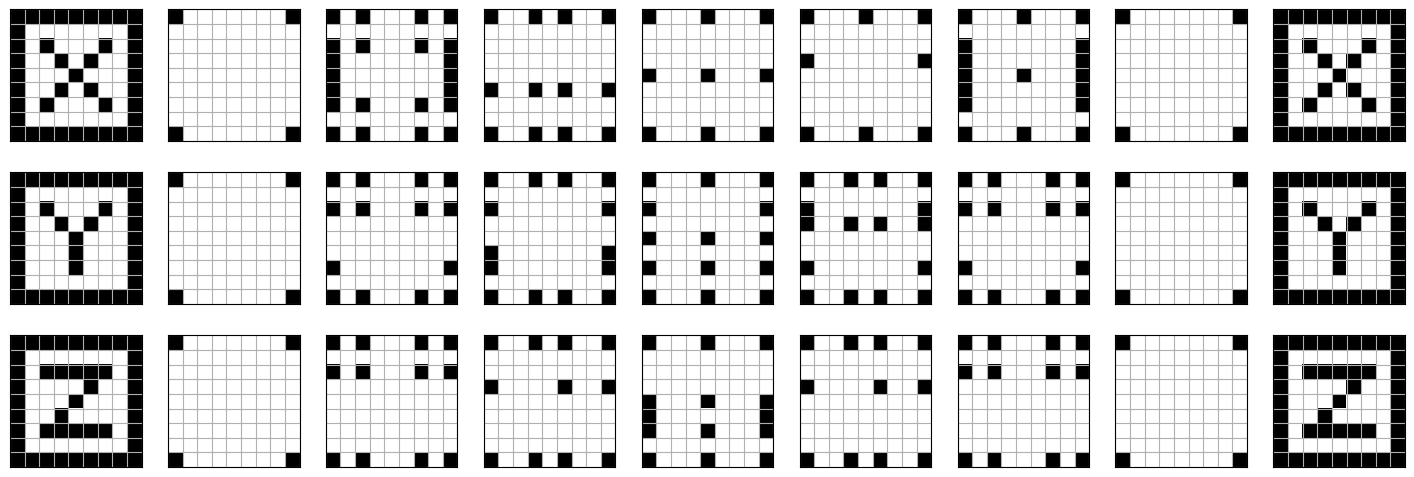

In [18]:
voxart.Design(design.find_removable_slow() * 2).slices_fig()

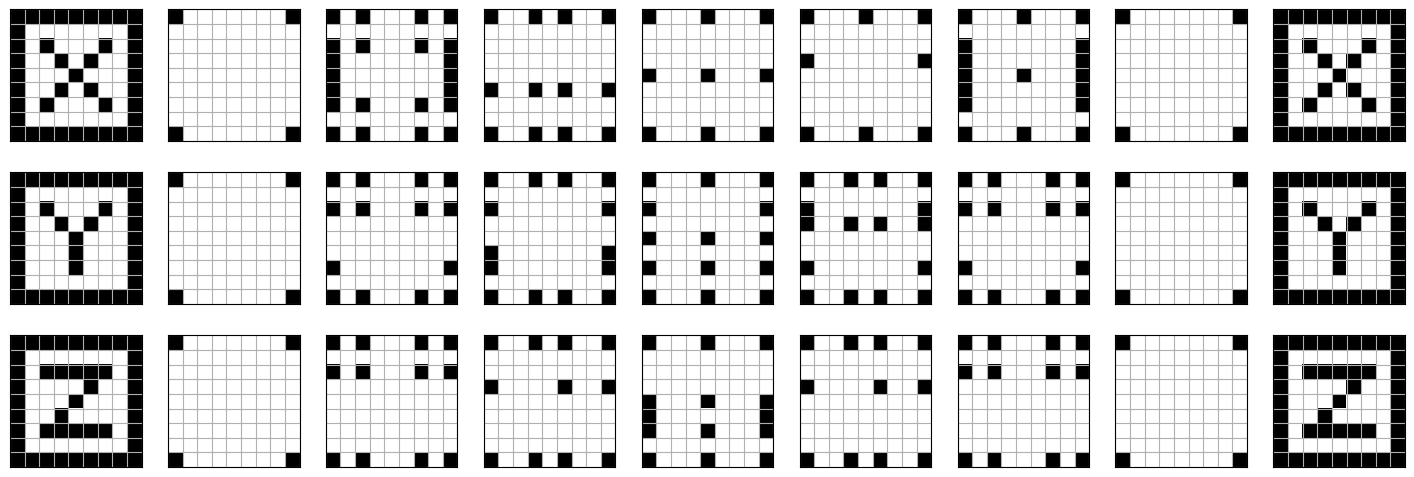

In [19]:
voxart.Design(design.find_removable() * 2).slices_fig()

## Search

Starting objective value: 153.0
Starting goal form 0
Starting goal form 1
Starting goal form 2
Starting goal form 3
Starting goal form 4
Starting goal form 5
Starting goal form 6
Starting goal form 7
Starting goal form 8
Starting goal form 9
Starting goal form 10
Starting goal form 11
Starting goal form 12
Starting goal form 13
Starting goal form 14
Starting goal form 15


,form_idx,is_starting,objective_value
136,12,False,37.0
11,1,True,152.0
142,12,False,37.0


form index: (5, False)
Value: 26.5


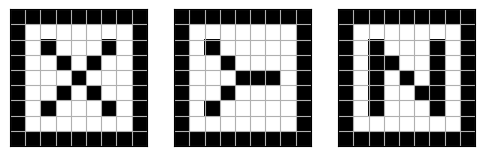

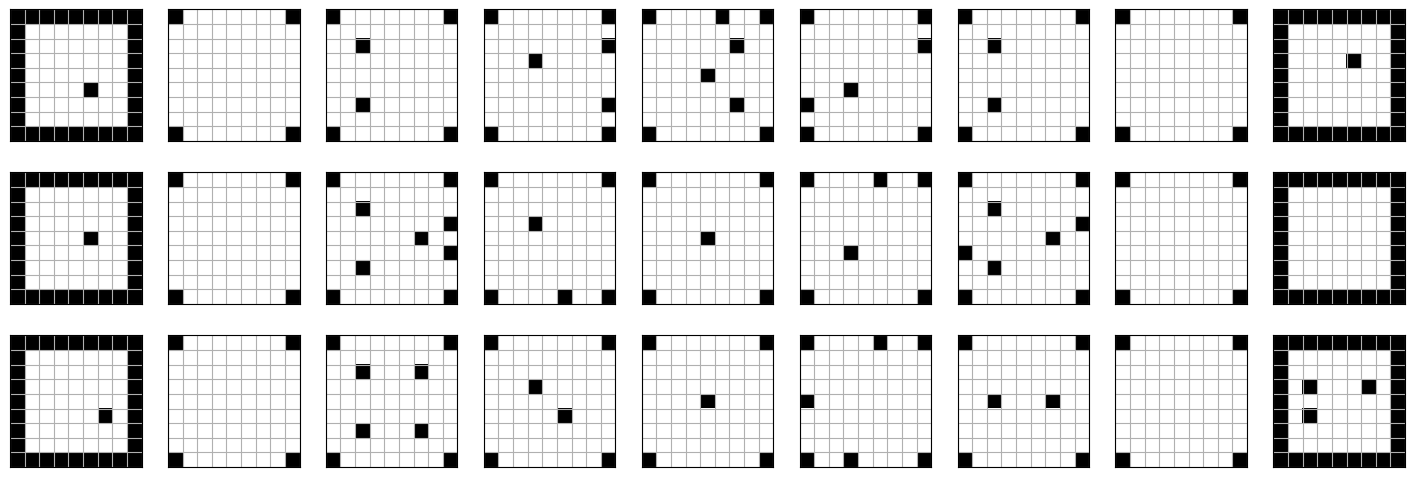

form index: (5, False)
Value: 26.5


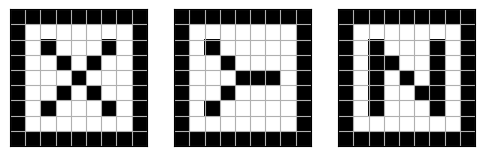

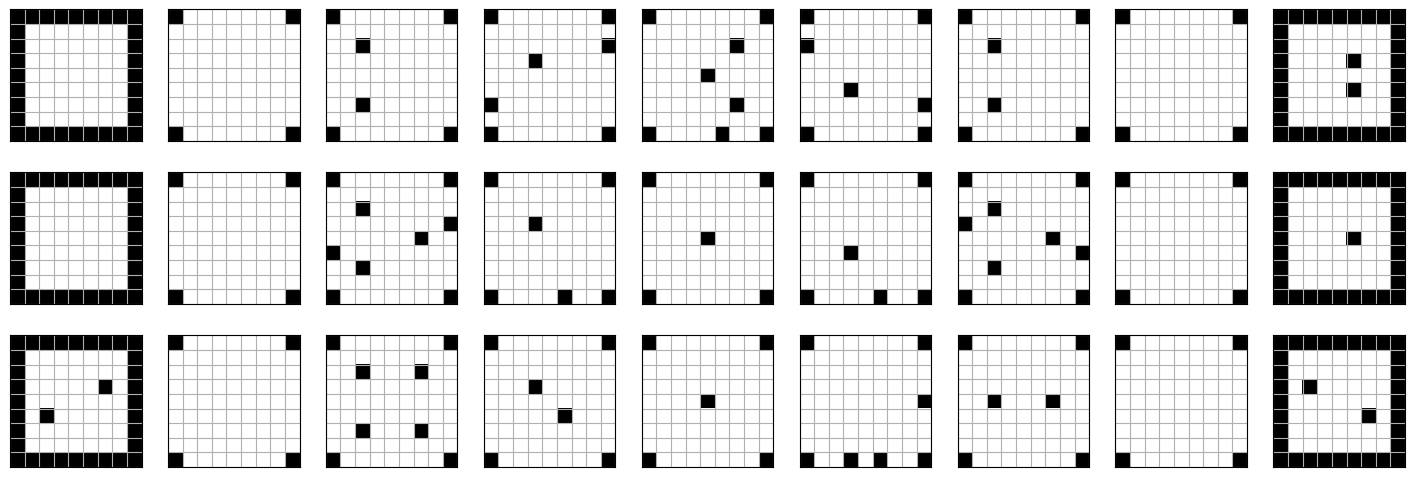

form index: (5, False)
Value: 26.5


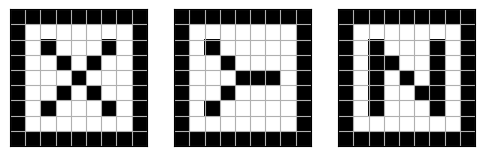

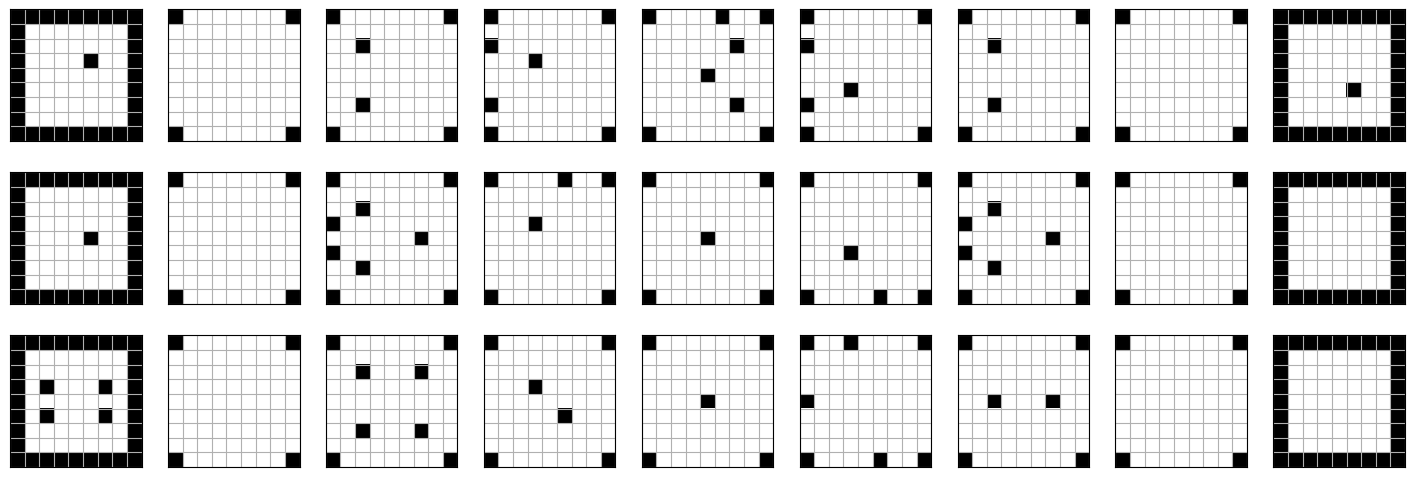

CPU times: user 7.95 s, sys: 520 ms, total: 8.47 s
Wall time: 7.13 s


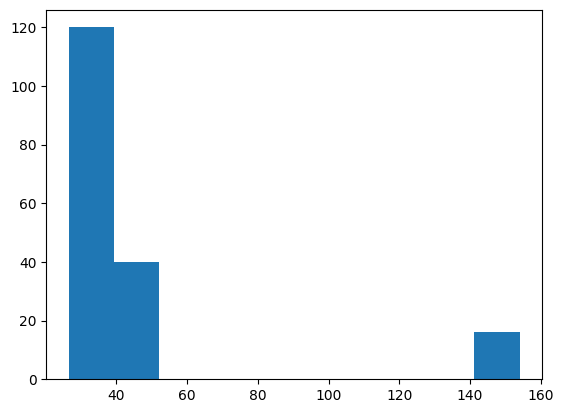

In [23]:
%%time
base_design = test_goal.create_base_design()
masks = voxart.Masks(base_design.size)
print("Starting objective value:", voxart.objective_value(base_design, masks))
results = voxart.search(test_goal, "random_face_first", 10, 3)
df_results = results.all_objective_values(["form_idx", "is_starting"])
display(df_results.sample(3))
plt.hist(df_results["objective_value"])
for label, design in results.best():
    print("form index:", label)
    print("Value:", voxart.objective_value(design, masks))
    display(design.projections_fig())
    display(design.slices_fig())

## Looking at equality operations

In [21]:
goal0 = voxart.Goal.from_arrays([[1, 1], [0, 0]],
                                [[1, 0], [0, 0]],
                                [[0, 1], [0, 0]])
goal1 = voxart.Goal.from_arrays([[1, 1], [0, 0]],
                                [[1, 0], [0, 0]],
                                [[0, 1], [0, 0]])
goal2 = voxart.Goal.from_arrays([[1, 1], [1, 1]],
                                [[1, 0], [1, 1]],
                                [[0, 1], [1, 1]])
goal3 = voxart.Goal.from_arrays(np.pad([[1]], 2, constant_values=0),
                                np.pad([[1]], 2, constant_values=0),
                                np.pad([[1]], 2, constant_values=0))
display(goal0 == goal1)
display(goal0 == goal2)
display(goal1 == goal2)
display(goal0 == goal3)

True

False

False

False

In [22]:
goal0._goals == goal3._goals

/var/folders/06/hmgfyb_d5076hlrrhyncy5vc0000gq/T/ipykernel_62647/2463477595.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  goal0._goals == goal3._goals


False

In [24]:
set([goal0, goal1, goal2, goal3])

TypeError: unhashable type: 'Goal'

In [26]:
hash(goal0._goals.data.tobytes())

2096551961257740828

## Making a faster find_removable

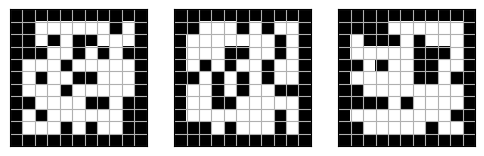

In [22]:
rng = np.random.default_rng()
goal_for_timing = voxart.Goal.from_arrays(
    rng.choice(a=[0, 2], p=[0.7, 0.3], size=(11, 11)),
    rng.choice(a=[0, 2], p=[0.7, 0.3], size=(11, 11)),
    rng.choice(a=[0, 2], p=[0.7, 0.3], size=(11, 11)))
goal_for_timing.add_frame()
design_for_timing = goal_for_timing.create_base_design()
design_for_timing.projections_fig()
    

In [27]:
%timeit design_for_timing.find_removable_slow()

3.2 ms ± 46 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
vox = design_for_timing.vox
display(np.sum(vox, axis=0))
display(np.sum(vox, axis=1))
display(np.sum(vox, axis=2))

array([[11,  5,  4,  3,  2,  4,  6,  3,  5,  4, 11],
       [ 9,  0,  0,  0,  2,  4,  0,  0,  0,  3,  9],
       [ 4,  0,  3,  0,  2,  0,  3,  0,  0,  2,  4],
       [ 4,  0,  2,  2,  0,  0,  0,  0,  0,  0,  4],
       [ 4,  0,  2,  0,  0,  2,  0,  0,  0,  0,  4],
       [ 2,  0,  0,  2,  0,  0,  0,  0,  2,  0,  2],
       [ 6,  3,  0,  0,  0,  0,  0,  0,  0,  2,  6],
       [ 4,  3,  0,  0,  0,  0,  2,  0,  0,  0,  4],
       [ 4,  0,  0,  0,  2,  0,  0,  0,  0,  2,  4],
       [ 4,  0,  2,  0,  0,  0,  3,  0,  0,  0,  4],
       [11,  5,  4,  3,  2,  4,  6,  3,  5,  4, 11]])

array([[11,  4,  6,  4,  5,  4,  5,  2,  3,  6, 11],
       [ 6,  0,  0,  0,  0,  0,  3,  0,  0,  0,  6],
       [ 6,  0,  0,  0,  0,  0,  3,  0,  0,  0,  6],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  2,  0,  6],
       [ 3,  2,  0,  0,  0,  0,  2,  0,  0,  2,  3],
       [ 3,  0,  0,  0,  0,  3,  0,  0,  0,  0,  3],
       [ 3,  0,  2,  2,  0,  3,  0,  2,  0,  0,  3],
       [ 4,  2,  0,  0,  0,  0,  2,  0,  0,  3,  4],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  2,  0,  3],
       [ 7,  4,  3,  0,  0,  0,  0,  0,  2,  0,  7],
       [11,  4,  6,  4,  5,  4,  5,  2,  3,  6, 11]])

array([[11,  5,  6,  4,  4,  4,  4,  4,  4,  4, 11],
       [ 3,  2,  0,  2,  0,  0,  2,  0,  0,  3,  3],
       [ 3,  2,  3,  0,  2,  0,  2,  0,  0,  0,  3],
       [ 3,  2,  0,  0,  0,  0,  2,  2,  0,  2,  3],
       [ 5,  0,  0,  0,  2,  0,  0,  0,  0,  0,  5],
       [ 3,  3,  0,  0,  0,  0,  0,  0,  0,  0,  3],
       [ 6,  3,  0,  0,  0,  0,  0,  0,  0,  0,  6],
       [ 5,  3,  0,  2,  0,  0,  0,  0,  0,  0,  5],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  2,  0,  3],
       [ 5,  2,  3,  0,  0,  0,  3,  3,  2,  0,  5],
       [11,  5,  6,  4,  4,  4,  4,  4,  4,  4, 11]])

In [29]:
x = np.sum(vox, axis=1)
x

array([[11,  4,  6,  4,  5,  4,  5,  2,  3,  6, 11],
       [ 6,  0,  0,  0,  0,  0,  3,  0,  0,  0,  6],
       [ 6,  0,  0,  0,  0,  0,  3,  0,  0,  0,  6],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  2,  0,  6],
       [ 3,  2,  0,  0,  0,  0,  2,  0,  0,  2,  3],
       [ 3,  0,  0,  0,  0,  3,  0,  0,  0,  0,  3],
       [ 3,  0,  2,  2,  0,  3,  0,  2,  0,  0,  3],
       [ 4,  2,  0,  0,  0,  0,  2,  0,  0,  3,  4],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  2,  0,  3],
       [ 7,  4,  3,  0,  0,  0,  0,  0,  2,  0,  7],
       [11,  4,  6,  4,  5,  4,  5,  2,  3,  6, 11]])

In [30]:
np.broadcast_to(np.expand_dims(x, axis=1), (11, 11, 11))

array([[[11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        ...,
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11]],

       [[ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        ...,
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6]],

       [[ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        ...,
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6]],

       ...,

       [[ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        ...,
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0

In [31]:
for ax in range(3):
    display(np.broadcast_to(np.expand_dims(np.sum(vox, axis=ax), axis=ax), (11, 11, 11)))

array([[[11,  5,  4, ...,  5,  4, 11],
        [ 9,  0,  0, ...,  0,  3,  9],
        [ 4,  0,  3, ...,  0,  2,  4],
        ...,
        [ 4,  0,  0, ...,  0,  2,  4],
        [ 4,  0,  2, ...,  0,  0,  4],
        [11,  5,  4, ...,  5,  4, 11]],

       [[11,  5,  4, ...,  5,  4, 11],
        [ 9,  0,  0, ...,  0,  3,  9],
        [ 4,  0,  3, ...,  0,  2,  4],
        ...,
        [ 4,  0,  0, ...,  0,  2,  4],
        [ 4,  0,  2, ...,  0,  0,  4],
        [11,  5,  4, ...,  5,  4, 11]],

       [[11,  5,  4, ...,  5,  4, 11],
        [ 9,  0,  0, ...,  0,  3,  9],
        [ 4,  0,  3, ...,  0,  2,  4],
        ...,
        [ 4,  0,  0, ...,  0,  2,  4],
        [ 4,  0,  2, ...,  0,  0,  4],
        [11,  5,  4, ...,  5,  4, 11]],

       ...,

       [[11,  5,  4, ...,  5,  4, 11],
        [ 9,  0,  0, ...,  0,  3,  9],
        [ 4,  0,  3, ...,  0,  2,  4],
        ...,
        [ 4,  0,  0, ...,  0,  2,  4],
        [ 4,  0,  2, ...,  0,  0,  4],
        [11,  5,  4, ...,  5,  4

array([[[11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        ...,
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11]],

       [[ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        ...,
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6]],

       [[ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        ...,
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6]],

       ...,

       [[ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        ...,
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0

array([[[11, 11, 11, ..., 11, 11, 11],
        [ 5,  5,  5, ...,  5,  5,  5],
        [ 6,  6,  6, ...,  6,  6,  6],
        ...,
        [ 4,  4,  4, ...,  4,  4,  4],
        [ 4,  4,  4, ...,  4,  4,  4],
        [11, 11, 11, ..., 11, 11, 11]],

       [[ 3,  3,  3, ...,  3,  3,  3],
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 3,  3,  3, ...,  3,  3,  3],
        [ 3,  3,  3, ...,  3,  3,  3]],

       [[ 3,  3,  3, ...,  3,  3,  3],
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 3,  3,  3, ...,  3,  3,  3],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 3,  3,  3, ...,  3,  3,  3]],

       ...,

       [[ 3,  3,  3, ...,  3,  3,  3],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 3,  3,  3, ...,  3,  3

Original design


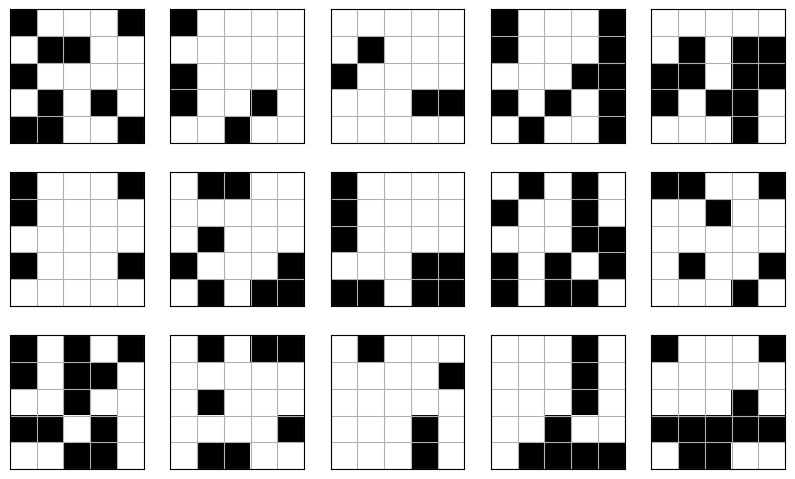

From slow process


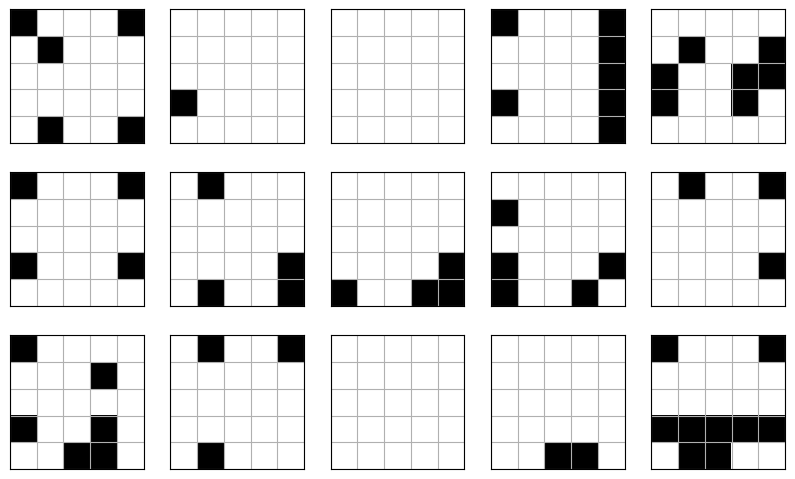

From fast process


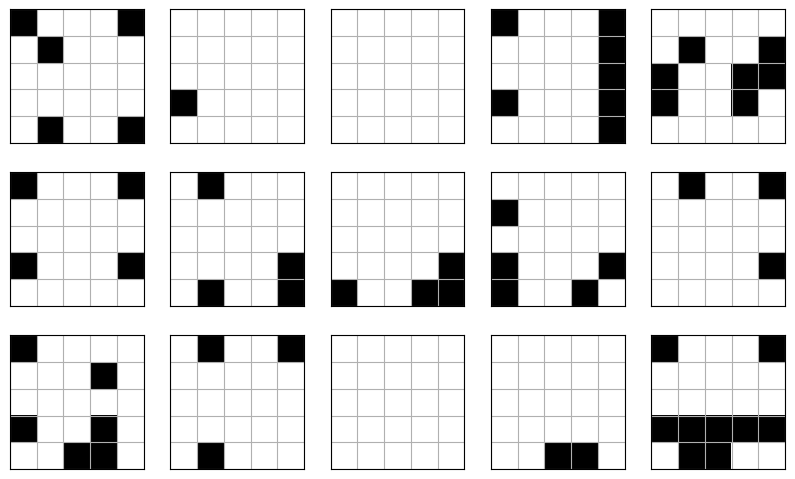

In [32]:
rng = np.random.default_rng(100)
size = 5
design = voxart.Design(rng.choice(a=[0, 1], p=[0.7, 0.3], size=(size, size, size)))
print("Original design")
display(design.slices_fig())
np.all(design.find_removable() == design.find_removable_slow())
print("From slow process")
display(voxart.Design(design.find_removable_slow()).slices_fig())
print("From fast process")
display(voxart.Design(design.find_removable()).slices_fig())

In [33]:
rng = np.random.default_rng(100)
size = 5
design = voxart.Design(rng.choice(a=[0, 1], p=[0.7, 0.3], size=(size, size, size)))
print("Original design")
display(design.vox[0, :, :])
#display(design.slices_fig())
#np.all(design.find_removable() == design.find_removable_slow())
print("From slow process")
display(voxart.Design(design.find_removable_slow()).vox[0, :, :])
print("From fast process")
display(voxart.Design(design.find_removable()).vox[0, :, :])
#display(voxart.Design(design.find_removable()).slices_fig())
print("Sums array")
display(design._debug_sums)

Original design


array([[1, 0, 0, 0, 1],
       [0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 1, 0, 0, 1]])

From slow process


array([[1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1]])

From fast process


array([[1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1]])

Sums array


AttributeError: 'Design' object has no attribute '_debug_sums'

In [36]:
%timeit design_for_timing.find_removable()

43.2 µs ± 607 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [51]:
help(np.load)

Help on function load in module numpy:

load(file, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII', *, max_header_size=10000)
    Load arrays or pickled objects from ``.npy``, ``.npz`` or pickled files.
    
    .. warning:: Loading files that contain object arrays uses the ``pickle``
                 module, which is not secure against erroneous or maliciously
                 constructed data. Consider passing ``allow_pickle=False`` to
                 load data that is known not to contain object arrays for the
                 safer handling of untrusted sources.
    
    Parameters
    ----------
    file : file-like object, string, or pathlib.Path
        The file to read. File-like objects must support the
        ``seek()`` and ``read()`` methods and must always
        be opened in binary mode.  Pickled files require that the
        file-like object support the ``readline()`` method as well.
    mmap_mode : {None, 'r+', 'r', 'w+', 'c'}, optional
       

## Playing with image loading

In [52]:
import imageio

ModuleNotFoundError: No module named 'imageio'

In [53]:
from PIL import Image

In [55]:
img = Image.open("/usr/share/httpd/icons/small/binary.png")
x = np.array(img)
display(x.shape)
display(x)

(16, 16)

array([[192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192,
        192, 192, 192],
       [192, 192, 192, 192, 192, 192, 192, 192, 140, 192, 192, 192, 192,
        192, 192, 192],
       [206, 255, 255, 255, 255, 255, 255, 206, 231, 140, 192, 192, 192,
        192, 192, 192],
       [206, 255, 255, 255, 255, 255, 255, 206, 255, 231, 140, 192, 192,
        192, 192, 192],
       [206, 255, 255, 255, 255, 255, 255, 206, 206, 206, 192, 140, 192,
        192, 192, 192],
       [206, 255, 255, 255, 255, 255, 255, 255,  57,  57,  57,  57, 192,
        192, 192, 192],
       [206, 255, 192, 107, 231, 206, 107, 206, 255, 192, 192, 107, 192,
        192, 192, 192],
       [206, 255, 107, 231, 140, 107, 255, 107, 255, 255, 231, 107, 192,
        192, 192, 192],
       [206, 255, 107, 255, 107, 107, 255, 107, 255, 255, 255, 107, 192,
        192, 192, 192],
       [206, 255, 140, 107, 231, 192, 107, 192, 255, 255, 255, 107, 192,
        192, 192, 192],
       [206, 255, 192, 107, 23

In [57]:
dir(img)

['_Image__transformer',
 '_PngImageFile__frame',
 '_PngImageFile__idat',
 '_PngImageFile__prepare_idat',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_category',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_fp',
 '_get_safe_box',
 '_getexif',
 '_getxmp',
 '_min_frame',
 '_new',
 '_open',
 '_reload_exif',
 '_repr_png_',
 '_repr_pretty_',
 '_seek',
 '_seek_check',
 '_size',
 '_text',
 'alpha_composite',
 'apply_transparency',
 'close',
 'convert',
 'copy',
 'crop',
 'cus

In [59]:
img.info

{'transparency': 192}